### Assessment One

In [8]:
import os
import numpy as np
import pandas as pd


In [10]:
!pip install xlrd

In [13]:
df = pd.read_csv('house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
# Read the dataset
df_info = df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


(None,
               area_type   availability                  location       size  \
 0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
 1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
 2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
 3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
 4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
 
    society total_sqft  bath  balcony   price  
 0  Coomee        1056   2.0      1.0   39.07  
 1  Theanmp       2600   5.0      3.0  120.00  
 2      NaN       1440   2.0      3.0   62.00  
 3  Soiewre       1521   3.0      1.0   95.00  
 4      NaN       1200   2.0      1.0   51.00  )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [20]:
df.shape

(13320, 9)

In [32]:
# Inspect the dataset to check for missing values
missing_info = df.isnull().sum()
missing_info

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [36]:
# Display basic info and missing value summary

missing_info = df.isnull().sum()
missing_percentage = (missing_info / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_info,
    'Percentage (%)': missing_percentage
})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
missing_data.head(15)  # Show top 15 features with missing values

,Missing Values,Percentage (%)
society,5502,41.306306
balcony,609,4.572072
bath,73,0.548048
size,16,0.120120
location,1,0.007508


### Data Column Category

 Column   | Missing % | Classification                        | Reasoning |
|----------|-----------|----------------------------------------|-----------|
| society  | 41.31%    | Missing Not at Random (MNAR)          | The missing values in the society column could be due to properties that are not 
                                                                 part of any society or are in less developed areas, which may not be reported 
                                                                (e.g., underdeveloped areas, informal settlements). |
| balcony  | 4.57%     | Missing at Random (MAR)               | The absence of balcony information may correlate with the type of property or its 
                                                                  price range. like house size, location or total_sqft. |
| bath     | 0.55%     | Missing at Random (MAR)               | The missing might depend on the type of property or its size., number of rooms.|
| size     | 0.12%     | Missing at Random (MAR)               | The missing size could be influenced by other factors such as the type of area or 
                                                                 society. |
| location | 0.01%     | Missing at Random (MAR)              | The missing value could be related to other observed variables (e.g. properties 
                                                                  without a specified location might be less desirable or in less popular areas). |

    Summary of Missing Values:

    MCAR: None identified

    MAR: Location, size, bath, balcony (correlated with other features)

    MNAR: Society (intentionally withheld or context-based)


## Assessment Two

### Data Aggregation and Grouping

In [88]:
df = pd.read_csv('us-counties-2020.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [102]:
# Summary of the average number of COVID cases by state.
avg_cases_by_state = df.groupby('state')['cases'].mean().reset_index().rename(columns={'cases': 'avg_cases'})
avg_cases_by_state.head()

,state,avg_cases
0,Alabama,1701.467328
1,Alaska,430.746604
2,Arizona,10717.680837
3,Arkansas,868.880665
4,California,10414.212011


## Summary of the Summarization.

I aggregated the data by state and calculated the average number of cases per state. Here are the key findings California as the highest 
#average cases due to early outbreaks in counties like Santa Clara, Los Angeles, and San Francisco. Other States like Texas, Massachusetts, 
and New Jersey also reported notable averages, though lower than the top states. Many states had sporadic cases, often linked to travel or localized 
outbreaks.

## Assessment Three 

### Time Series Analysis

In [175]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [176]:
df = pd.read_csv('us-counties-2020.csv')

In [177]:
# Convert date column to datetime

df['date'] = pd.to_datetime(df['date']) 


In [184]:
# Get the latest date in the dataset

latest_date = df['date'].max()

In [186]:
# Filter for California
# Use California as a case study for visualization

california_df = df[df['state'] == 'California']

In [188]:
# Group by month and calculate new cases using California (not cumulative)

monthly_cases = (
    california_df
    .groupby(pd.Grouper(key='date', freq='M'))['cases']
    .sum()
    .diff()  # Compute new cases by subtracting previous month
    .fillna(0)
)

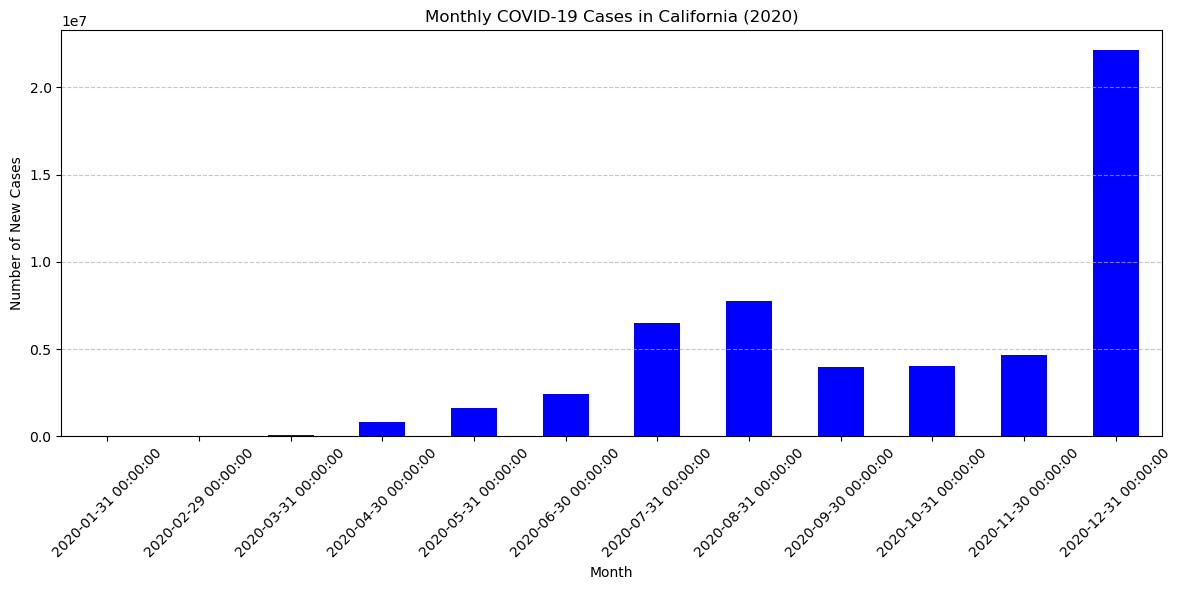

In [190]:
# Plot the monthly new cases
plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='bar', color='blue')
plt.title('Monthly COVID-19 Cases in California (2020)')
plt.xlabel('Month')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [193]:
# Filter for Texas
Texas_df = df[df['state'] == 'Texas']

In [196]:
# Group by month and calculate new cases
monthly_cases = (
    Texas_df
    .groupby(pd.Grouper(key='date', freq='M'))['cases']
    .sum()
    .diff()
    .fillna(0)
)

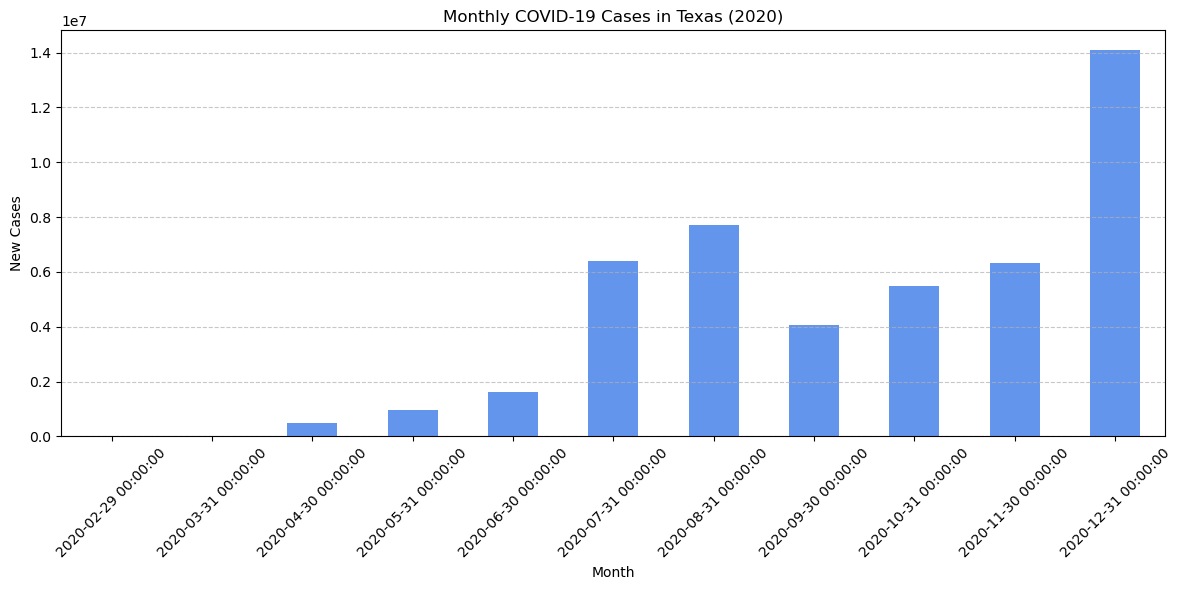

In [199]:
# Plot the monthly new cases

plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='bar', color='cornflowerblue')
plt.title("Monthly COVID-19 Cases in Texas (2020)")
plt.xlabel("Month")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()